<a href="https://colab.research.google.com/github/syokoysn/machine-learning/blob/master/Decision_Tree/CART(Classification_and_Regression_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CART( Classification and Regression Tree )

分類と回帰の両方のタスク処理できる，木構造をベースにした Leo Breiman 氏らが考案したアルゴリズムです.    
Random ForestやBoosting Treeなどの基盤となっていて，多様な応用がなされています．  
CARTは下の図のような二分木で表現できます．木の各深さの親nodeは 一つの入力された変数 $x$に対しある基準で分割します.    
その，ある基準を決定してうまく分類することができます．この基準を決定するための指標に，**Gini不純度**もしくは，**エントロピー**を使います．



情報利得


### Gini 不純度
これは，純粋性を表現する指標です．つまり，うまく分けることができているかを評価するためのものです．呼び方はいろいろあるかもしれないですが，ここでは，Gini不純度と表現します．(気になる人は，[この辺](https://datascience.stackexchange.com/questions/1095/gini-coefficient-vs-gini-impurity-decision-trees) 読んでもらったらいいかと )  
では，中身を具体的に考えていきましょう.  
$n$個の要素から構成される，ある多重集合 $S$ があるとします．$S$はある基準によって$C$個に分類することができます．この時,Gini不純度は以下のように表します．
$$Gini = 1 - \sum_{c=1}^{C}p(c)^{2}$$


あとで使うのでここで実装しときます．




In [0]:
def gini(data):
  C = np.unique(data)# クラスの個数
  n = len(data)#
  return 1 - sum([ ( np.where( data ==  c, 1, 0).sum()/ n)**2 for c in C])

Gini不純度を用いて，

### エントロピー

In [0]:
import numpy as np

In [0]:
data = np.random.randint(1, 5,100)
C = np.unique(data) 
n = len(data)+0.0

[ ( np.where( data ==  c, 1, 0).sum()/ n)**2 for c in C]

[0.0729, 0.0576, 0.0256, 0.10890000000000001]

In [0]:
gini(data)

0.735

## アルゴリズム


次の操作を繰り返す
1. 各特徴量で
2. 

## 実装

注)メソッド名等は，sklearnの仕様に寄せてます．


In [4]:
import numpy as np, pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df .head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:

class Node :
  
  def __init__(self, data, target):
    '''
    input :
      data : array or df 
        
    '''
    
    # data の型をarrayに統一
    if type(data) == pd.DataFrame :
      self.data = data.values
    else :
      self.data = data
    
    #  特徴量は番号で保持
    self. feature = range(data.shape[1])
    
    # 特徴量が一つなら停止 = stop => True 
    self.stop = False 
    if len(self.feature) == 1 :
      self.stop = True 
      
    # 子node の初期設定
    self.left = None
    self.right = None
    
    
  def grow(self):
    
    
    if len(np.unique(target)) == 1:
            self.label = target[0]
            return
    return 
  def __str__(self):
    return 

In [0]:
 t_data =df.values[:,0]
data2= np.unique(t_data)

In [0]:
target = iris.target
gini(target)

0.6666666666666667

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
def gain( parent_gini, left_data, right_data , ):
  l = len(left_data); r = len(right_data);n = l +r 
  return parent_gini - (l/n * gini(left_data) + r/n * gini(right_data))

def max_gain(data, target, parent_gini, keep = False ):
  result = (None, 0,None, None)# 結果(分割点, gini, left, right)
  if keep :
    gain_list = []
  #分割点の候補を列挙
  uni = np.unique(data)
  split_candidate = ( uni[:-1] + uni[1:] )/ 2.0
  # 分割点における
  for i in split_candidate :
    left =target[np.where(data <= i)]
    right =target[np.where(data > i)]
    # gainの計算
    g = gain(parent_gini, left, right)
    if result[1] < g :
      result = (i, g, left, right)
    if keep :
      gain_list.append(g)
    
  if keep :
    return result, gain_list
  else :
    return result

In [0]:
gini(target)

0.6666666666666667

In [0]:
class CART :
  def __init__(self):
    self.Tree =  None
    
  def fit(self, x, y ):
    Tree = Node(x,y)
    
    return 
  def grow(self,x,y):
    

In [0]:
model = CART()

In [0]:
from  sklearn.tree import DecisionTreeClassifier

使用するライブラリの準備

In [0]:
!pip install dtreeviz
!pip install graphviz

  Stored in directory: /root/.cache/pip/wheels/4c/3f/87/b2c828617d1bd181145fbaf41129e4c82fa8d9a98082701e00
Successfully built dtreeviz


In [0]:
def train_decision_tree(x, y): 
  feature, value = get_best_split(x, y)
  x_left, y_left = x[x[feature] < value], y[x[feature] < value]
  if len(y_left.unique()) > 1:
    left_node = train_decision_tree(x_left, y_left)
  else:
    left_node = None
  
  x_right, y_right = x[x[feature] >= value], y[x[feature] >= value]
  if len(y_right.unique()) > 1:
    right_node = train_decision_tree(x_right, y_right)
  else:
    right_node = None
  return Node(feature, value, left_node, right_node)

In [0]:
def get_best_split(x, y): 
  best_split = None
  best_entropy = 1.
  for feature in x.columns.values:
    print(feature)
    column = x[feature]
    for value in column.iterrows():
      a = y[column < value] == class_a_value
      b = y[column < value] == class_b_value
      left_weight = (a + b) / len(y.index)
      left_entropy = entropy(a, b)
      a = y[column >= value] == class_a_value
      b = y[column >= value] == class_b_value
      right_items = (a + b) / len(y.index)
      right_entropy = entropy(a, b)
      split_entropy = left_weight * left_etropy + right_weight * right_entropy
      if split_entropy < best_entropy:
        best_split = (feature, value)
        best_entropy = split_entropy
  return best_split

In [0]:
get_best_split(df, iris.target)

sepal length (cm)


AttributeError: ignored

In [0]:
import math
def entropy(a, b):
  total = a + b
  prob_a = a / total
  prob_b = b / total
  return - prob_a * math.log(prob_a, 2) - prob_b * math.log(prob_b, 2)

In [0]:
import numpy as np, pandas as pd
from sklearn import datasets



In [0]:
irisdata = datasets.load_iris()

In [0]:
df = pd.DataFrame(irisdata.data, columns=irisdata.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [0]:
from sklearn.datasets import load_iris
clf = DecisionTreeClassifier(max_depth=3)  # limit depth of tree
iris = load_iris()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

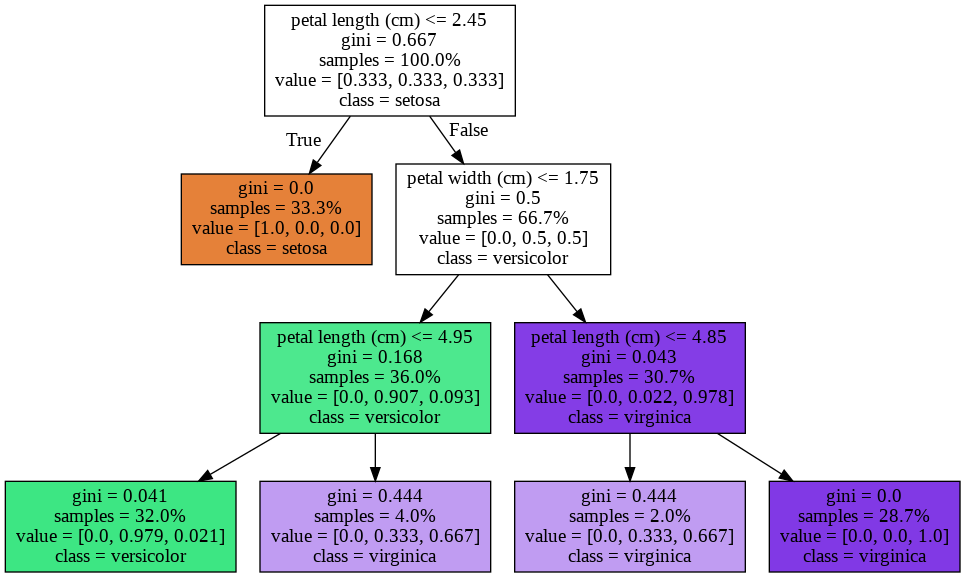

In [0]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph

dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


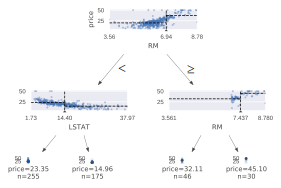

In [0]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
import graphviz

regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

viz = dtreeviz(regr,
               boston.data,
               boston.target,
               target_name='price',
               feature_names=boston.feature_names)
              
viz    

In [0]:
class Node :
  

In [0]:
import numpy as np


class _Node:
    """決定木のノードクラス"""

    def __init__(self):
        """初期化処理

        left       : 左の子ノード（しきい値未満）
        right      : 右の子ノード（しきい値以上）
        feature    : 分割する特徴番号
        threshold  : 分割するしきい値
        label      : 割り当てられたクラス番号
        numdata    : 割り当てられたデータ数
        gini_index : 分割指数（Giniインデックス）
        """

        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None
        self.numdata = None
        self.gini_index = None

    def build(self, data, target):
        """木の構築を行う

        data   : ノードに与えられたデータ
        target : データの分類クラス
        """

        self.numdata = data.shape[0]
        num_features = data.shape[1]

        # 全データが同一クラスとなったら分割終了
        if len(np.unique(target)) == 1:
            self.label = target[0]
            return

        # 自分のクラスを設定(各データの多数決)
        class_cnt = {i: len(target[target==i]) for i in np.unique(target)}
        self.label= max(class_cnt.items(), key=lambda x:x[1])[0]

        # 最良の分割を記憶する変数
        best_gini_index = 0.0 # 不純度変化なし
        best_feature = None
        best_threshold = None

        # 自分の不純度は先に計算しておく
        gini = self.gini_func(target)

        for f in range(num_features):

            # 分割候補の計算
            data_f = np.unique(data[:, f]) # f番目の特徴量（重複排除）
            points = (data_f[:-1] + data_f[1:]) / 2.0 # 中間の値を計算

            # 各分割を試す
            for threshold in points:

                # しきい値で2グループに分割
                target_l = target[data[:, f] <  threshold]
                target_r = target[data[:, f] >= threshold]

                # 分割後の不純度からGiniインデックスを計算
                gini_l = self.gini_func(target_l)
                gini_r = self.gini_func(target_r)
                pl = float(target_l.shape[0]) / self.numdata
                pr = float(target_r.shape[0]) / self.numdata
                gini_index = gini - (pl * gini_l + pr * gini_r)

                # より良い分割であれば記憶しておく
                if gini_index > best_gini_index:
                    best_gini_index = gini_index
                    best_feature = f
                    best_threshold = threshold

        # 不純度が減らなければ終了
        if best_gini_index == 0:
            return

        # 最良の分割を保持する
        self.feature = best_feature
        self.gini_index = best_gini_index
        self.threshold = best_threshold

        # 左右の子を作って再帰的に分割させる
        data_l   =   data[data[:, self.feature] <  self.threshold]
        target_l = target[data[:, self.feature] <  self.threshold]
        self.left = _Node()
        self.left.build(data_l, target_l)

        data_r   =   data[data[:, self.feature] >= self.threshold]
        target_r = target[data[:, self.feature] >= self.threshold]
        self.right = _Node()
        self.right.build(data_r, target_r)

    def gini_func(self, target):
        """Gini関数の計算

        target : 各データの分類クラス
        """
        classes = np.unique(target)
        numdata = target.shape[0]

        # Gini関数本体
        gini = 1.0
        for c in classes:
            gini -= (len(target[target == c]) / numdata) ** 2.0

        return gini

    def prune(self, criterion, numall):
        """木の剪定を行う

        criterion  : 剪定条件（この数以下は剪定対象）
        numall    : 全ノード数
        """

        #自分が葉ノードであれば終了
        if self.feature == None:
            return

        # 子ノードの剪定
        self.left.prune(criterion, numall)
        self.right.prune(criterion, numall)

        # 子ノードが両方葉であれば剪定チェック
        if self.left.feature == None and self.right.feature == None:

            # 分割の貢献度：GiniIndex * (データ数の割合)
            result = self.gini_index * float(self.numdata) / numall

            # 貢献度が条件に満たなければ剪定する
            if result < criterion:
                self.feature = None
                self.left = None
                self.right = None

    def predict(self, d):
        """入力データ（単一）の分類先クラスを返す"""

        # 自分が節の場合は条件判定
        if self.feature != None:
            if d[self.feature] < self.threshold:
                return self.left.predict(d)
            else:
                return self.right.predict(d)

        # 自分が葉の場合は自分の分類クラスを返す
        else:
            return self.label

    def print_tree(self, depth, TF):
        """分類条件を出力する"""

        head = "    " * depth + TF + " -> "

        # 節の場合
        if self.feature != None:
            print head + str(self.feature) + " < " + str(self.threshold) + "?"
            self.left.print_tree(depth + 1, "T")
            self.right.print_tree(depth + 1, "F")

        # 葉の場合
        else:
            print head + "{" + str(self.label) + ": " + str(self.numdata) + "}"


class DecisionTree:
    """CARTによる分類木学習器"""

    def __init__(self, criterion=0.1):
        """初期化処理

        root : 決定木のルートノード
        criterion : 剪定の条件
            (a) criterion(大) -> 木が浅くなる
            (b) criterion(小) -> 木が深くなる
        """
        self.root = None
        self.criterion = criterion

    def fit(self, data, target):
        """学習を行い決定木を構築する

        data   : 学習データ
        target : 各データの分類クラス
        """
        self.root = _Node()
        self.root.build(data, target)
        self.root.prune(self.criterion, self.root.numdata)
        pass

    def predict(self, data):
        """分類クラスの予測を行う

        data : テストデータ
        """
        ans = []
        for d in data:
            ans.append(self.root.predict(d))
        return np.array(ans)

    def print_tree(self):
        """分類木の情報を表示する"""
        self.root.print_tree(0, " ")

SyntaxError: ignored